In [1]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#downloads file from given url
def download(url, fpath):
    import requests
    r = requests.get(url)
    with open(fpath, 'wb') as f:
        f.write(r.content)
    return None

#fetching data file
def fetchDatafromWeb(filePath,url):
    download(url,filePath)
    return filePath

# 1. Kmeans clustering

In [3]:
url="https://www.cdslab.org/recipes/programming/clustering-kmeans/points.txt"

In [4]:
fetchDatafromWeb(filePath="./points.txt", url=url)

'./points.txt'

In [5]:
df=pd.read_csv("./points.txt")
df

x         y
0    9.345086  8.635191
1    9.549745  8.358315
2    9.485531  8.594657
3    9.591068  8.487629
4    9.472495  8.604223
..        ...       ...
995  4.562102  5.085064
996  4.525696  5.121790
997  4.557869  5.072882
998  4.651561  5.107200
999  4.576210  4.860474

[1000 rows x 2 columns]

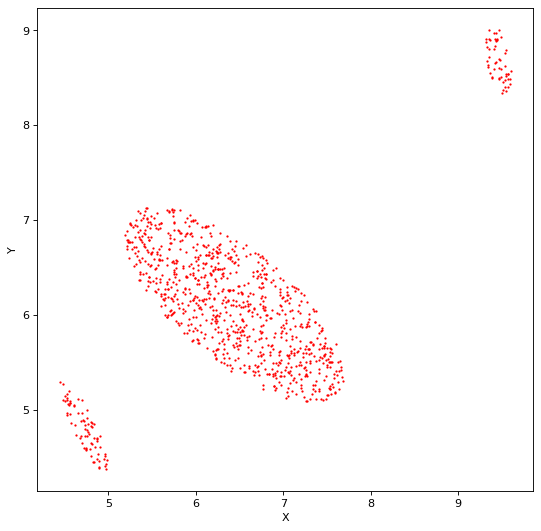

In [44]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(df["x"],df["y"],s=1, c="r")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
Point =np.array (np.transpose([df.x,df.y]))

In [28]:
#object - memberships
PointclusterId = KMeans( n_clusters =3 
                          , random_state= 544
                          , init ="k-means++"
                          , n_init= 100
                          , max_iter =300
                          , tol =0.001 #how much center can change by
                       ).fit_predict(Point)


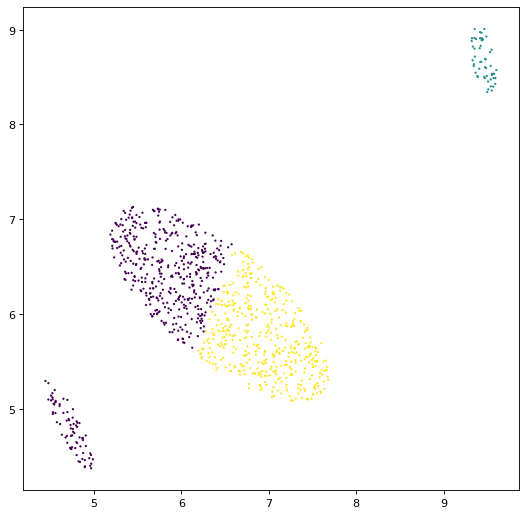

In [29]:
fig =plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(1,1,1)

plt.scatter ( Point[:,0] \
             ,Point[:,1] \
             ,c = PointclusterId \
             ,s =1 \
            )

In [ ]:
#..."which number of cluster is good?"

# 2. Kmeans clustering: Determining the cluster number using the Elbow method

In [34]:
url2 = "https://www.cdslab.org/recipes/programming/clustering-kmeans-customers/customers.csv"

In [35]:
fetchDatafromWeb(filePath="./customers.csv", url=url2)

'./customers.csv'

In [36]:
df_2=pd.read_csv("./customers.csv")
df_2

CustomerID   Genre  Age  AnnualIncomeK  SpendingScore_1_100
0             1    Male   19             15                   39
1             2    Male   21             15                   81
2             3  Female   20             16                    6
3             4  Female   23             16                   77
4             5  Female   31             17                   40
..          ...     ...  ...            ...                  ...
195         196  Female   35            120                   79
196         197  Female   45            126                   28
197         198    Male   32            126                   74
198         199    Male   32            137                   18
199         200    Male   30            137                   83

[200 rows x 5 columns]

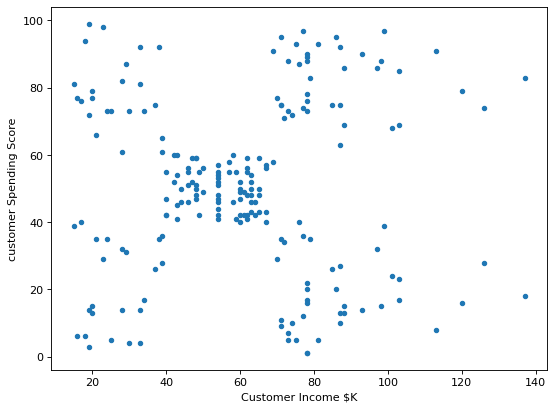

In [45]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_2["AnnualIncomeK"],df_2["SpendingScore_1_100"], s=15)
plt.xlabel('Customer Income $K')
plt.ylabel('customer Spending Score')
plt.show()

In [55]:
#Elbow Method
Data =np.array (np.transpose([df_2.AnnualIncomeK,df_2.SpendingScore_1_100]))
X=df_2.iloc[:, [3,4]].values

In [58]:
#at 1:20:00
wcsds = []
for i in range(1,11):
    kmeans = KMeans (n_clusters =i, init = "k-means++",random_state =42)
    kmeans.fit(X)
    wcsds.append(kmeans.inertia_)

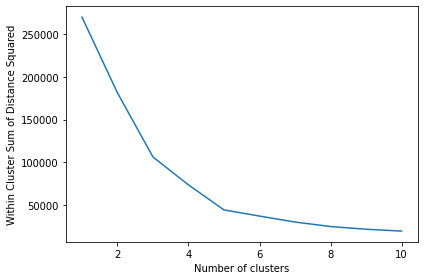

In [59]:
plt.plot(range(1,11), wcsds)
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Distance Squared")
plt.tight_layout()
plt.show()

# 3. Kmeans clustering - an implementation

In [60]:
url3 = "https://www.cdslab.org/recipes/programming/clustering-kmeans-implementation/points.txt"

In [61]:
fetchDatafromWeb(filePath="./points_2.txt", url=url3)

'./points_2.txt'

In [63]:
df_3=pd.read_csv("./points_2.txt")
df_3

x         y
0     3.597482 -0.727244
1     3.171670 -0.602071
2     3.279193 -0.751740
3     3.641694 -0.712578
4     3.283454 -0.872950
...        ...       ...
1995 -0.891907  1.647074
1996 -0.682693  2.209732
1997 -0.359197  1.894838
1998 -0.691762  1.855902
1999 -0.819440  1.544326

[2000 rows x 2 columns]

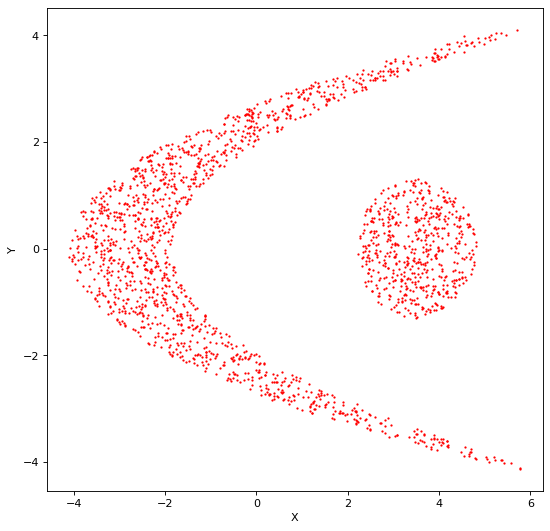

In [64]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(df_3["x"],df_3["y"],s=1, c="r")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [65]:
Pt =np.array (np.transpose([df_3.x,df_3.y]))

In [159]:
#object - memberships
memb = KMeans( n_clusters =6 
              , random_state= 544
              , init ="k-means++"
              , n_init= 100
              , max_iter =300
              , tol =0.001 #how much center can change by
             ).fit_predict(Pt)


In [162]:
memb = KMeans( n_clusters =6 
              , random_state= 544
              , init ="k-means++"
              , n_init= 100
              , max_iter =300
              , tol =0.001 #how much center can change by
             ).fit(Pt)
memb.predict(Pt)

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [163]:
memb.cluster_centers_

array([[-2.75293928, -0.01826797],
       [ 3.4908477 , -0.00883781],
       [ 2.68292366,  3.26787138],
       [-0.74834768, -1.98793548],
       [-0.92785127,  1.88795059],
       [ 2.82047551, -3.31198359]])

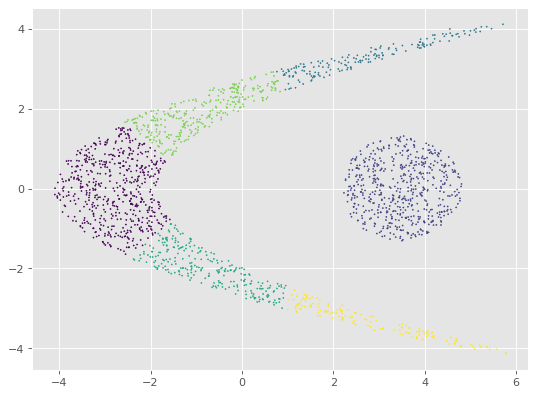

In [147]:
fig =plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(1,1,1)

plt.scatter ( Pt[:,0] \
             ,Pt[:,1] \
             ,c = memb \
             ,s =1 \
            )

"k-means best suited for circular data"

In [70]:
wcsds_2 = []
for i in range(1,11):
    Kmeans = KMeans (n_clusters =i, init = "k-means++",random_state =42)
    Kmeans.fit(Pt)
    wcsds_2.append(Kmeans.inertia_)

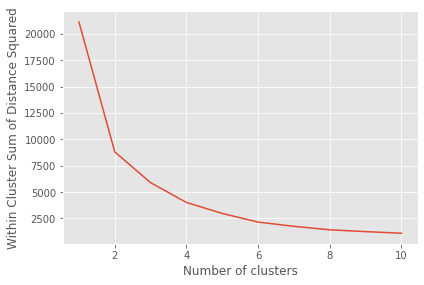

In [148]:
plt.plot(range(1,11), wcsds_2)
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Distance Squared")
plt.tight_layout()
plt.show()

In [72]:
Pt

array([[ 3.59748245, -0.72724364],
       [ 3.17167032, -0.60207064],
       [ 3.27919288, -0.7517402 ],
       ...,
       [-0.35919741,  1.89483774],
       [-0.69176164,  1.85590248],
       [-0.81944017,  1.54432571]])

In [365]:
class K_Means:
    def __init__(self, k, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        

    def fit_pred(self,data):
    
        self.centroids = {}
        #randomly initilized centers
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.memberships = {}
        

            for i in range(self.k):
                self.memberships[i] = []
            #compute distances of each point from each cluster
            for val in data:
                distances = [np.linalg.norm(val-self.centroids[centroid]) for centroid in self.centroids]
                memb = distances.index(min(distances))
                self.memberships[memb].append(val)

            prev_centroids = dict(self.centroids)

            for memb in self.memberships:
                self.centroids[memb] = np.average(self.memberships[memb],axis=0)

            optimized = True

            for c in self.centroids:
                
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
            
            if optimized:
                break

        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        memb = distances.index(min(distances))
        return memb

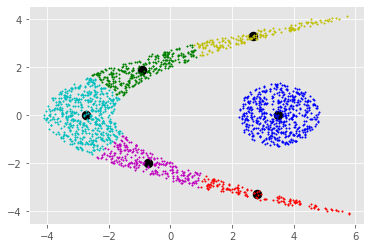

In [366]:
modl = K_Means(k=6)
modl.fit_pred(Pt)

#m= model.fit_pred(data=Pt,k=6)
colormap = np.array(['r', 'g', 'b','y','m','c'])
for centroid in modl.centroids:
    plt.scatter(modl.centroids[centroid][0], modl.centroids[centroid][1],
                marker="o", color="k", s=20, linewidths=5)

for memb in modl.memberships:
    color = colormap[memb]
    for val in modl.memberships[memb]:
        plt.scatter(val[0], val[1], c=color, s=2)
        
plt.show()

everytime upd center, no memebership change 
specify thold sa tol, if all center dont change by tol, then it converges...

# 4.Online experimentation with DBSCAN clustering technique

1. What are the two free parameters of the DBSCAN clustering technique?

 - epsilon and min number of neighborhoods

2. Choose a set of parameters for DBSCAN on this page for the uniform dataset such that all points are partitioned a single cluster. Is this set of parameters unique to achieve the same clustering result? If not, provide another example set of parameters?

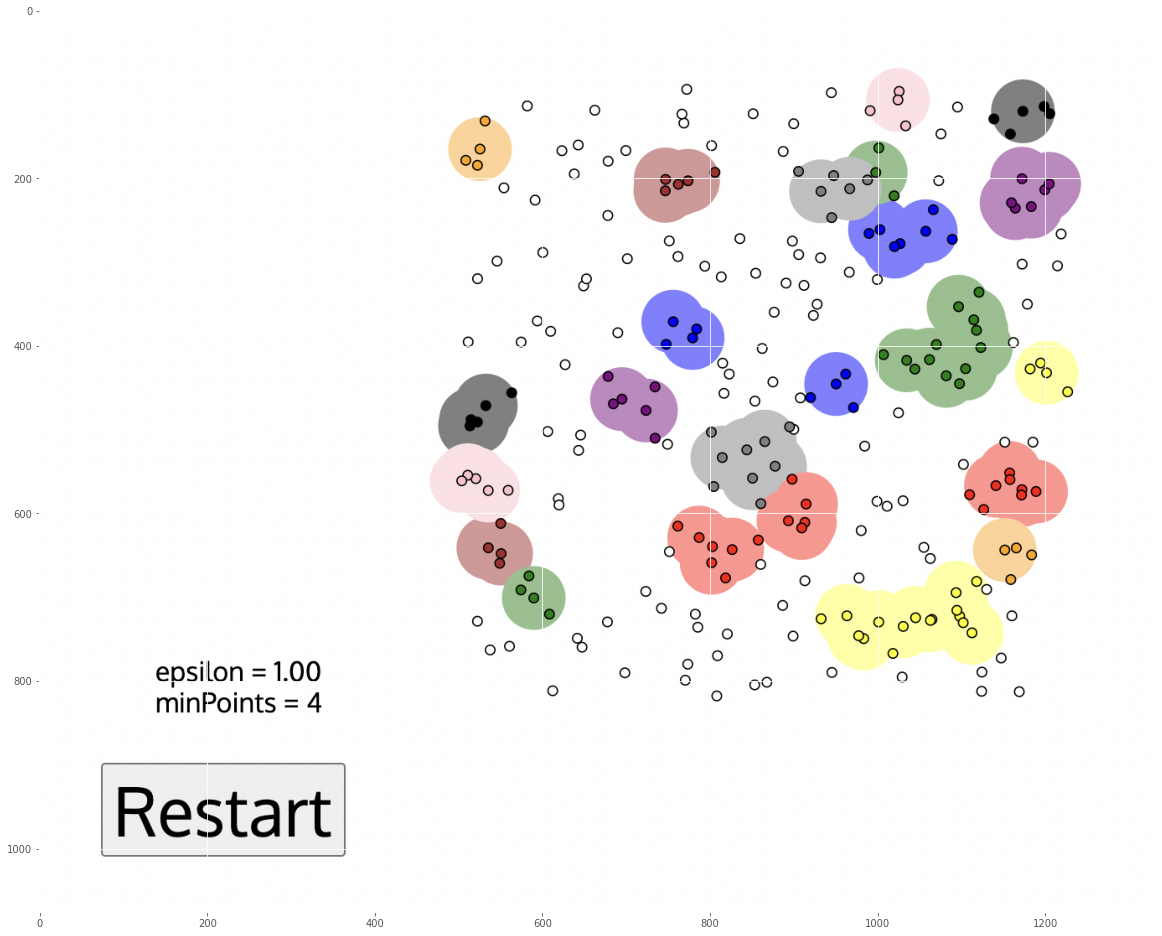

In [290]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('1sttry.png')
plt.imshow(img)
plt.show()

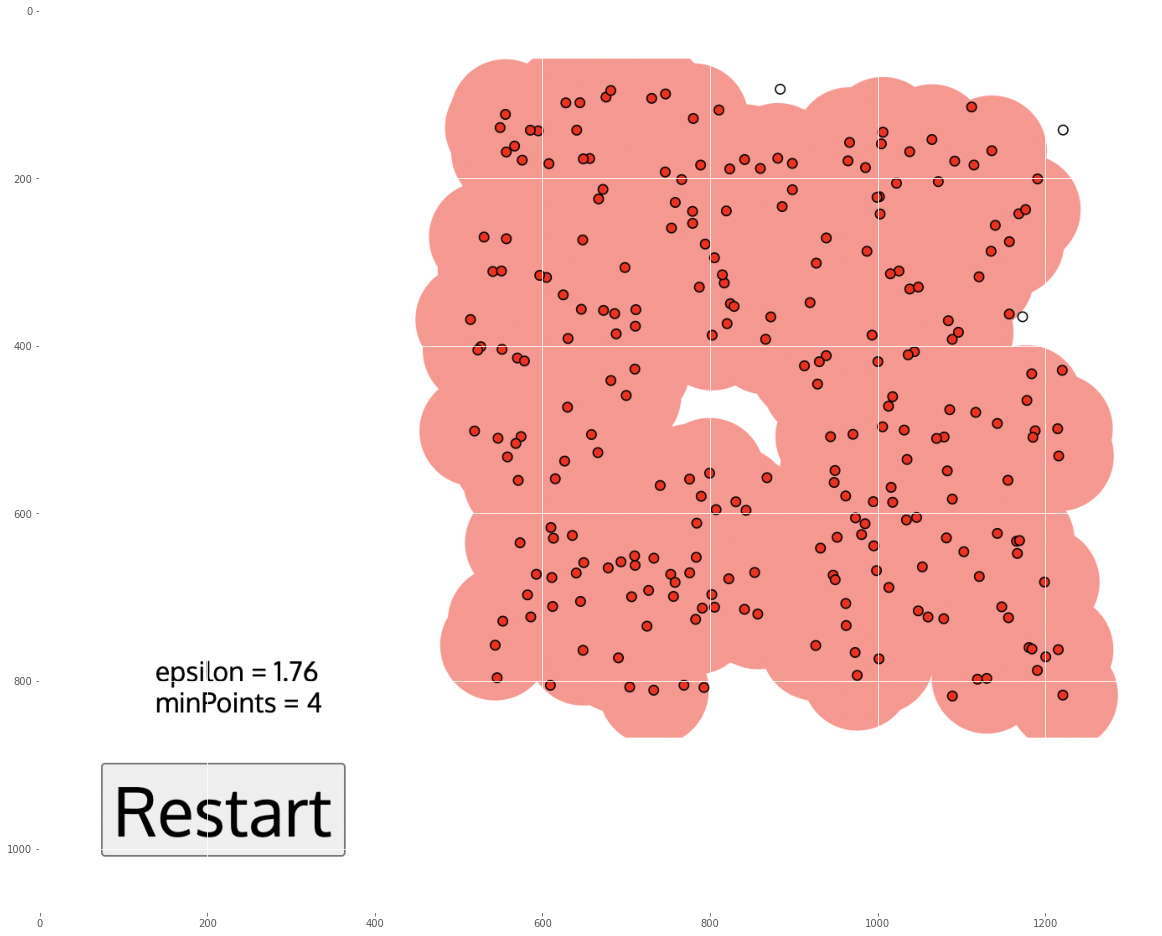

In [294]:
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('3try.png')
plt.imshow(img)
plt.show()

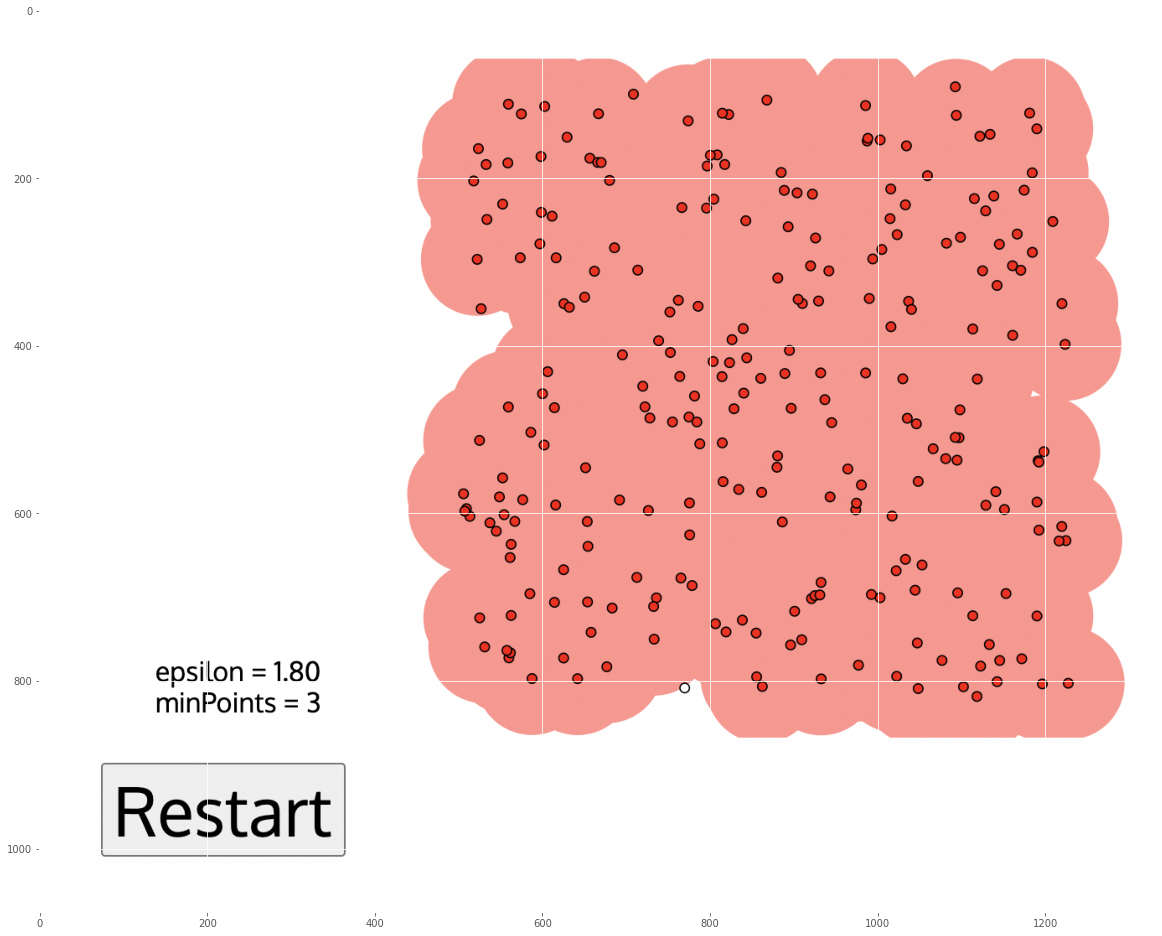

In [295]:
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('4try.png')
plt.imshow(img)
plt.show()

3. Now, choose another set of parameters such that there is at least one outlier (noise) point left at the end of clustering that does not belong to any cluster.

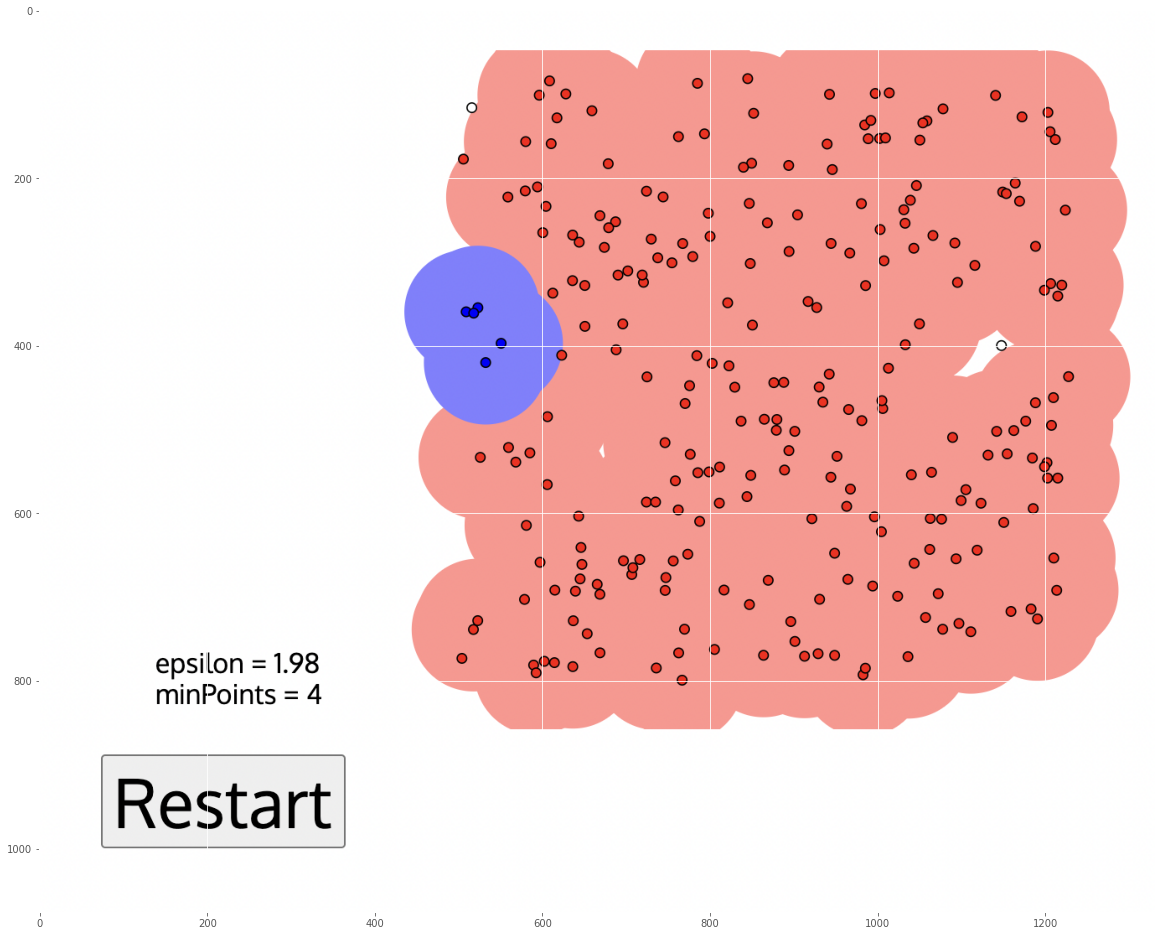

In [293]:
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('2try.png')
plt.imshow(img)
plt.show()

# 5. Online comparison of the Kmeans clustering algorithm with DBSCAN

1. Visit this page and choose the first choice stating I’ll Chooose. You will be taken to a new page.
2. On this new page, choose Smiley Face. Then, you will be taken to a another page where you see a set of points like a smiley face.


3. You will notice that you have the choice of adding (specifying) as many cluster centers as you like. Using mouse clicks, specify (add) four cluster centers on your best guess for the cluster centers.

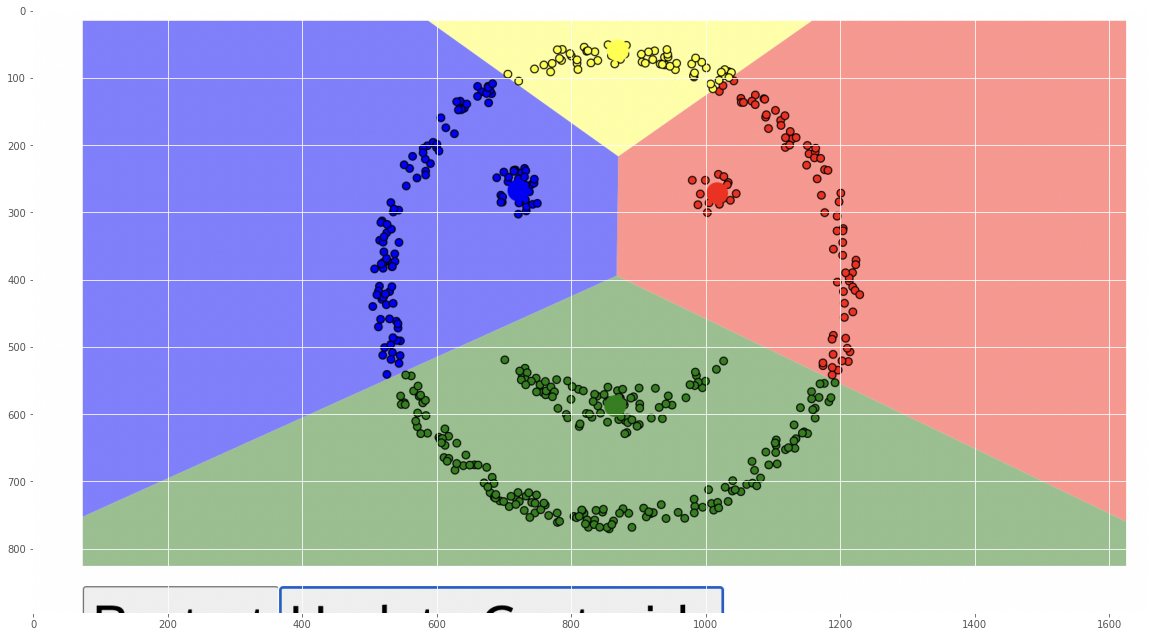

In [296]:
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('1smiley.png')
plt.imshow(img)
plt.show()

4. Then, press Go! and then continue updating Centroids (cluster centers) until the cluster do not change visibly anymore (convergence to a set of clusters has occurred).

5. Is the final set of clusters that you get satisfying?
6. Take a screenshot of the clusters that you get and submit it with your homework.

The final set of clusters seem more evenly distributed but centroid are not within points

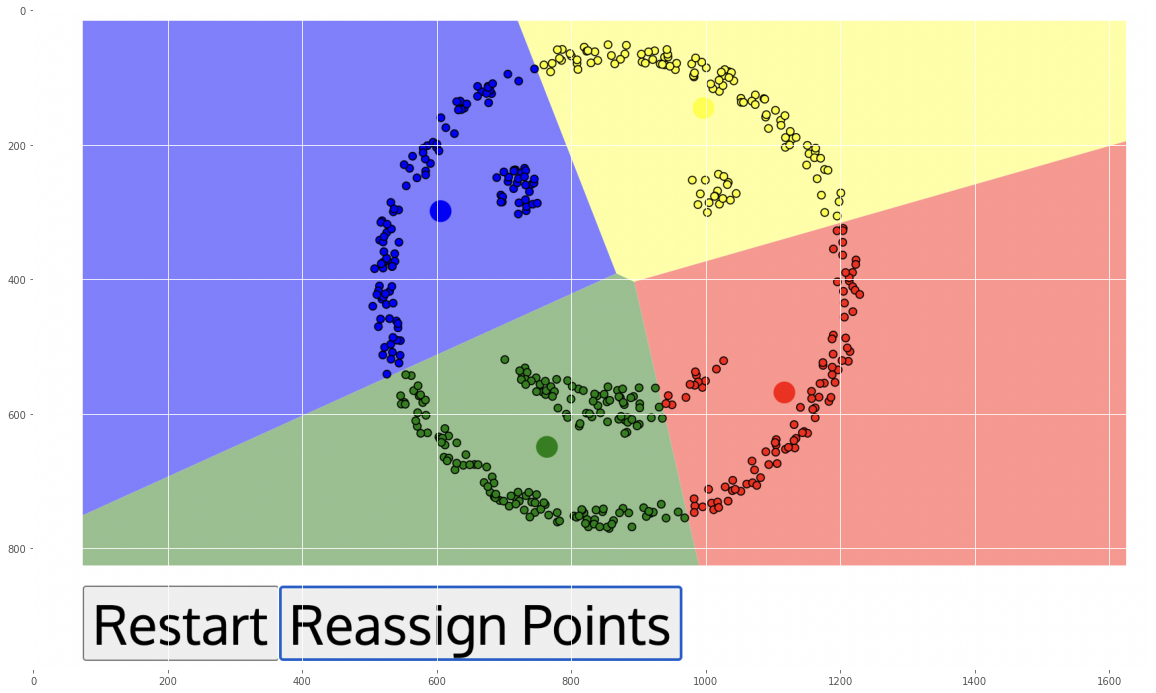

In [297]:
#update until cluster do not change visibly anymore
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('2smiley.png')
plt.imshow(img)
plt.show()

7. Repeat this procedure with a new random set of cluster centers.

8. Do the resulting clusters look the same as you got before? Why?
9. Take a screenshot of the clusters that you get and submit it with your homework.

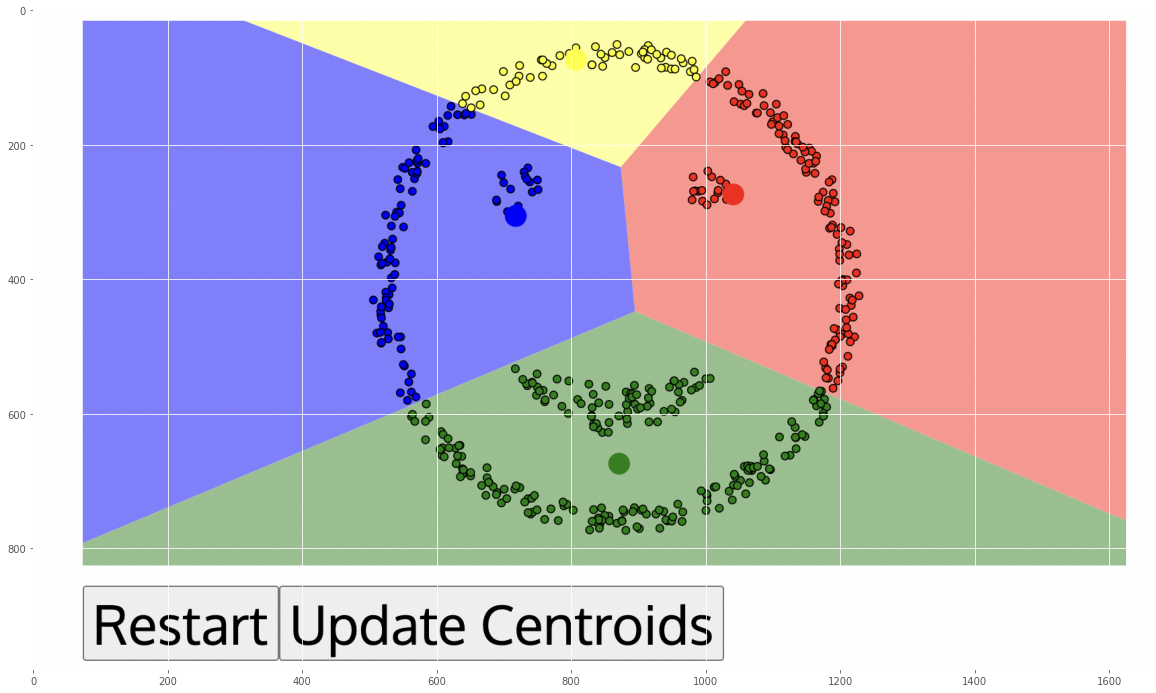

In [298]:
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('3smiley.png')
plt.imshow(img)
plt.show()

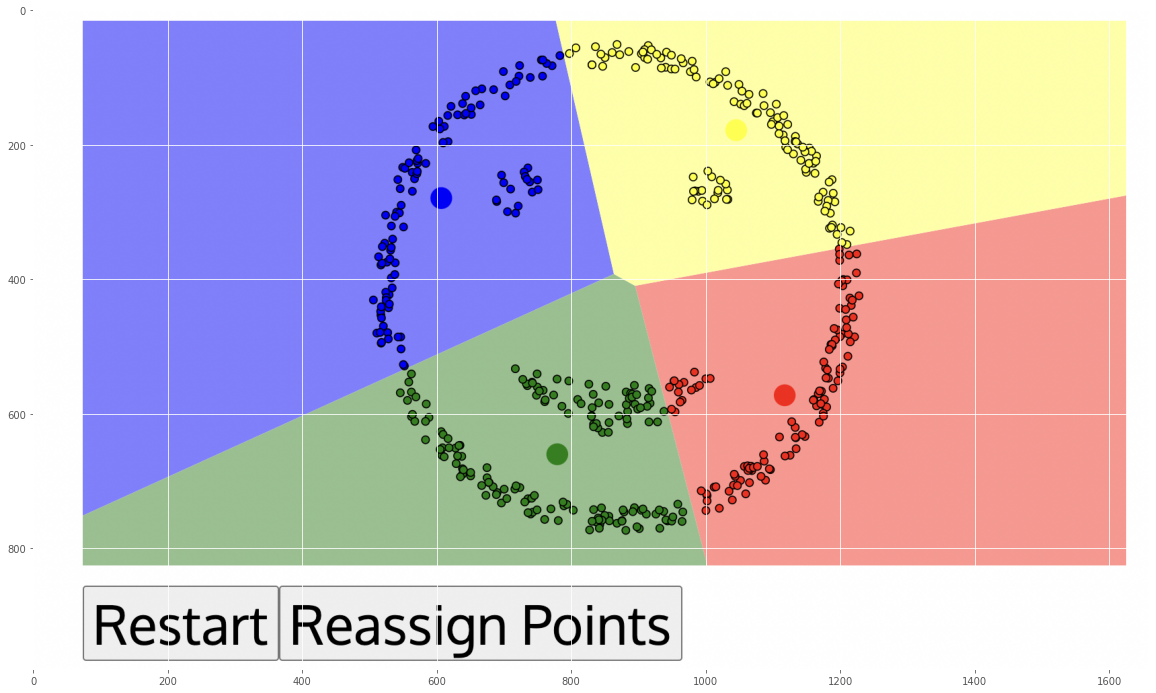

In [299]:
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('4smiley.png')
plt.imshow(img)
plt.show()

Now, visit this website and choose the same option Smiley Face as before to perform DBSCAN clustering on the same Smiley Face data. Adjust the parameters such that the two eyes, mouth, and the face-circle each become separate clusters. Why is the DBSCAN clustering so much more successful than the Kmeans? Take a screenshot of the clustering result to submit with your homework.

Kmeans :we choose a k (number of clusters) and centroid for each k cluster
DBSCAN better because it does not require for us to specify k . Given k, it causes anomolous pts to be assigned to the same cluster as normal data pts

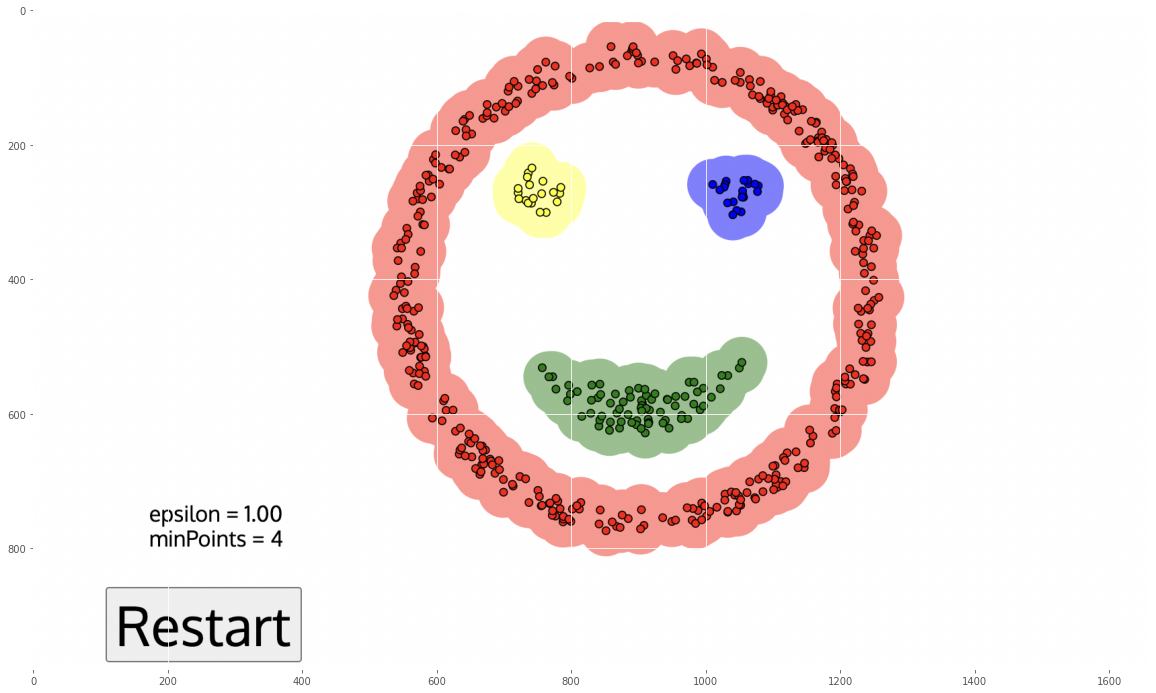

In [300]:
fig = plt.figure(figsize=(20, 20))
img = mpimg.imread('5smiley.png')
plt.imshow(img)
plt.show()